In [485]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [487]:
df=pd.read_csv('C:/Users/spsha/Downloads/titanic.csv')

In [488]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [489]:
# TO find missing values

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [492]:
missing_values=df.isna()
print(missing_values)

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [493]:
df.shape

(891, 12)

In [494]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [495]:
# to fill missing values
# replaceing missing values in "Age" with mean values.

In [496]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [497]:
#replacing the missing values in embarked colume there is no interger value so cannot go for mean, hence we use mode.
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [498]:
filling_values=df.fillna(0)
print(filling_values)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [499]:
# If need drop variable
# Drop 'cabin' column due to high percentage of missing values.

In [500]:
df=df.drop(columns=['Cabin'])

In [501]:
df.shape

(891, 11)

In [502]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [503]:
from sklearn.preprocessing import LabelEncoder

In [504]:
cols=['Sex','Embarked']
l = LabelEncoder()

for col in cols:
    df[col]=l.fit_transform(df[col])

In [505]:
# Visualisation

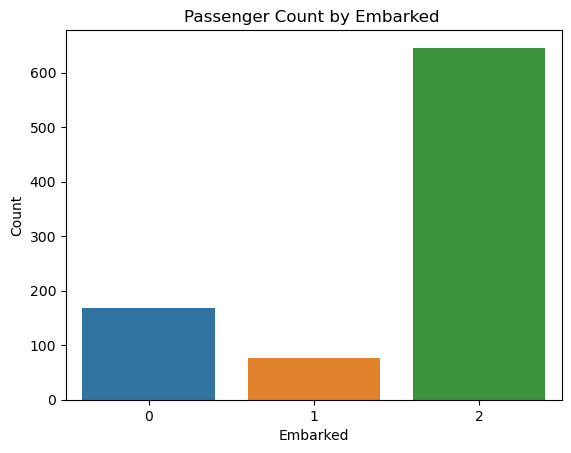

In [506]:
# Bar plot
#s means Southampton, England passenger boarded the ship
#c means Queenstown (now Cobh), Ireland passenger boarded the ship
#q means Cherbourg, France passenger boarded the ship
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarked ')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

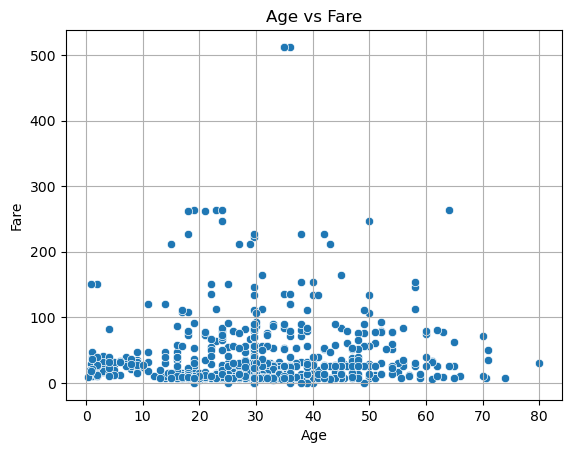

In [507]:
# Scatter plot
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()

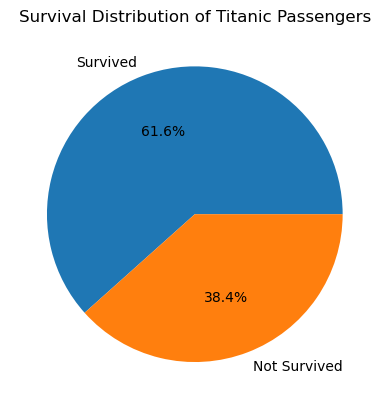

In [508]:
# Plotting the pie chart
labels = ['Survived','Not Survived']
size=df['Survived'].value_counts()
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Survival Distribution of Titanic Passengers')
plt.show()

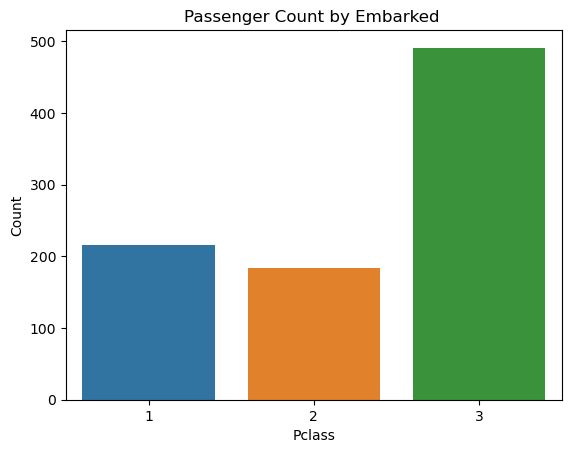

In [509]:
# Bar plot
#1  means Higher class in ship
#2 means Midiam class in ship
#3 means Low class in ship
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Embarked ')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

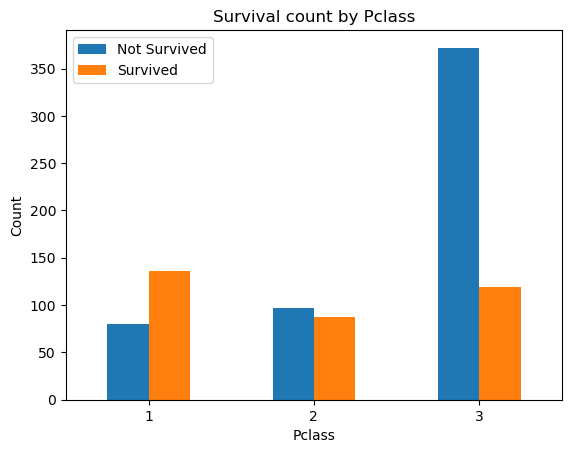

In [510]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Group data by Pclass and Survived, count occurrences, and unstack it
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting
grouped.plot(kind='bar', stacked=False)
plt.title('Survival count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.show()

In [511]:
#drop unnecessary columns
#choose dependent & independent variable
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'],axis=0)
x = df.drop(columns=['Survived'])
y = df['Survived'] #Independent variable

In [512]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [513]:
# Split the data into training and testing sets with an 80:20 ratio
import pandas as pd
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [514]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [515]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (712,) (179,)


In [516]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [517]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Fit the classifier on X_train and y_train directly (handles NaNs)
model.fit(x_train, y_train)

HistGradientBoostingClassifier()

In [518]:
# Predict on the test data
y_predict = model.predict(x_test)

In [519]:
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [575]:
from sklearn.metrics import classification_report
#F1 Score=2×[(Precision+Recall/(Precision×Recall)]
# Generate classification report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [549]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_m = confusion_matrix(y_test, y_predict)
print(conf_m)
#Accuracy: Overall accuracy can be calculated as 
#TN=True Negative, TP=True Positive, FP=False Positive, FN=False Negative.
#(TN+TP)/(TN+FP+FN+TP). In this case
#(89+56)/(89+16+18+56)=0.81 or 81.00

[[86 19]
 [18 56]]


In [551]:
#Recall= TP/(TP+FN)
from sklearn.metrics import precision_score, recall_score, accuracy_score
recall = recall_score(y_test, y_predict)
print(recall)

0.7567567567567568


In [552]:
#Precision= TP/(TP+FP)​
precision = precision_score(y_test, y_predict)
print(precision)

0.7466666666666667


In [553]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Initialize KNN classifier
k=7
knn_model1 = KNeighborsClassifier(n_neighbors=k)

In [554]:
knn_model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [555]:
# Predict on the test data
y_predict = knn_model1.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


In [557]:
con_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con_mat)

Confusion Matrix:
[[86 19]
 [31 43]]


In [558]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
recall = recall_score(y_test, y_predict)
print(recall)

0.581081081081081


In [559]:
precision = precision_score(y_test, y_predict)
print(precision)

0.6935483870967742


In [560]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=42)
# Train the classifier
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [561]:
# Predict on the test set
y_predict = dec_tree.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [562]:
# Display classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [563]:
con_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(con_mat)

Confusion Matrix:
[[86 19]
 [18 56]]


In [564]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
recall = recall_score(y_test, y_predict)
print(recall)

0.7567567567567568


In [565]:
precision = precision_score(y_test, y_predict)
print(precision)

0.7466666666666667


In [566]:
#comparison # naive boys 
#knn #decision tree compair #accuracy #recall #precision

In [567]:
# Initialize models
models = {
    "Naive Bayes": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

In [568]:
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })

In [569]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)

                 Model  Accuracy  Precision    Recall
0          Naive Bayes  0.810056   0.777778  0.756757
1  K-Nearest Neighbors  0.720670   0.693548  0.581081
2        Decision Tree  0.793296   0.746667  0.756757
